In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import sys
sys.path.append('../python')
import dataPython as dp
import scipy.interpolate as inter

from datetime import datetime
import scipy.integrate as si
import noordermeer as noord
import time

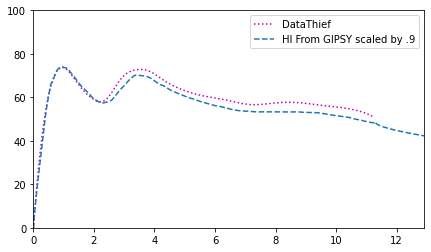

113
113
1301
1243
[ 0.       17.581412 32.10569  45.934013 59.5712   69.213517 72.984628
 77.501139 79.347689 79.442708 78.978796 77.167718 75.210489 73.093417
 70.848105 69.013649 67.533779 65.758056 63.996081 62.942005 61.987112
 61.772254 62.182361 62.641588 64.032374 66.029575 68.176997 69.788887
 71.692584 73.418851 74.874524 75.481635 75.334632 75.192757 74.847259
 74.179827 73.157925 71.938973 70.860852 70.288441 69.297139 68.283383
 67.48484  66.767847 66.080003 65.388142 64.726276 64.169269 63.755086
 63.127066 62.545055 62.067793 61.584556 61.109838 60.637656 60.27893
 60.014204 59.631221 59.202321 58.712271 58.34927  58.085539 57.907206
 57.774466 57.656491 57.540758 57.384745 57.288061 57.336592 57.354072
 57.359889 57.351193 57.340266 57.330011 57.304498 57.270022 57.245085
 57.260707 57.312806 57.324204 57.266231 57.118611 57.079534 57.014834
 56.933028 56.934807 56.766061 56.497782 56.203836 55.941456 55.66963
 55.425377 55.220696 55.048466 54.838104 54.525728 54.049654 

In [2]:


dat2_import = dp.getXYZdata('rotmod_gas.dat')
r2 = dat2_import['xx']
v2_file = dat2_import['zz']

fromplot_import = dp.getXYdata('../NGC_5005/datatheif_gas_spline.txt')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']
plt.figure(figsize=(7,4))
#plt.plot(r_fromplot2,v_fromplot2,'X',color='black',markersize=10,label='DataThief2')
plt.plot(r_fromplot,v_fromplot,':',color='m',markersize=10,label='DataThief')
plt.plot(r2,.93*np.asarray(v2_file),'--',label='HI From GIPSY scaled by .9')

plt.legend()
plt.ylim([0,100])
plt.xlim([0,12.9])
plt.show()

print(len(r_fromplot))
print(len(v_fromplot))
X= np.asarray(v2_file)

print(len(X))
X=X[:len(X)-58]
print(len(X))
X=X[0::11]
print(X)
print(len(X))

In [3]:
def g(r,GG):
    return GG*X

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#gas
g_params.add('GG', value=1, min=0) #Mass

#Do fit
g_fit = g_mod.fit(v_fromplot,g_params,r=r_fromplot)
bestg = g_fit.best_fit
print('Fit information for all-component fit, prefactor:')
g_fit

Fit information for all-component fit, prefactor:


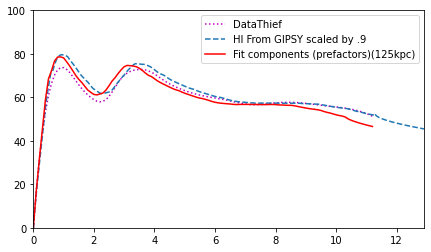

In [4]:
plt.figure(figsize=(7,4))

plt.plot(r_fromplot,v_fromplot,':',color='m',markersize=10,label='DataThief')
plt.plot(r2,np.asarray(v2_file),'--',label='HI From GIPSY scaled by .9')
plt.plot(r_fromplot,bestg,'r-',label='Fit components (prefactors)(125kpc)')

plt.legend()
plt.ylim([0,100])
plt.xlim([0,12.9])
plt.show()

In [5]:
#import traced data thief for bulge
bfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_bulge.txt')
rb_fromplot = bfromplot_import['xx']
vb_fromplot = bfromplot_import['yy']

xb2_import = dp.getXYZdata('bulgebulge.dat')
rb2 = xb2_import['xx']
vb2_file = xb2_import['zz']

print(len(rb_fromplot))
print(len(vb2_file))
X= np.asarray(vb2_file)

print(len(X))
X=X[:len(X)-9]
print(len(X))
X=X[0::68]
print(X)
print(len(X))

19
1301
1301
1292
[  0.       647.992136 530.965206 439.663541 381.049599 340.821123
 311.125695 288.046422 269.442756 254.033066 240.996927 229.781554
 219.999089 211.368287 203.679578 196.773167 190.5248   184.836205
 179.628504]
19


In [6]:
def g(r,GB):
    return GB*np.asarray(X)

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#gas
g_params.add('GB', value=1, min=0) #Mass

#Do fit
g_fit = g_mod.fit(vb_fromplot,g_params,r=rb_fromplot)
bestg = g_fit.best_fit
print('Fit information for all-component fit, prefactor:')
g_fit

Fit information for all-component fit, prefactor:


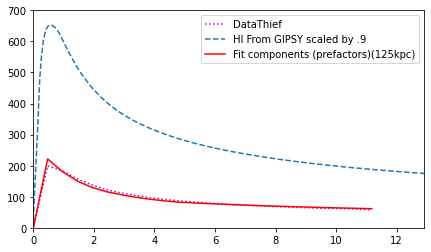

In [7]:
plt.figure(figsize=(7,4))

plt.plot(rb_fromplot,vb_fromplot,':',color='m',markersize=10,label='DataThief')
plt.plot(rb2,np.asarray(vb2_file),'--',label='HI From GIPSY scaled by .9')
plt.plot(rb_fromplot,bestg,'r-',label='Fit components (prefactors)(125kpc)')
plt.legend()
plt.ylim([0,700])
plt.xlim([0,12.9])
plt.show()

In [8]:
#import traced data thief for disk
dfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_disk.txt')
rd_fromplot = dfromplot_import['xx']
vd_fromplot = dfromplot_import['yy']

#import rotmod output for disk
d_import = dp.getXYZdata('diskdisk.dat')
rdM = d_import['xx']
vdM = d_import['zz']

print(len(rd_fromplot))
print(len(vdM))
X= np.asarray(vdM)

print(len(X))
X=X[:len(X)-5]
print(len(X))
X=X[0::72]
print(X)
print(len(X))

18
1301
1301
1296
[  0.       137.469229 166.590127 198.185905 221.775705 224.569699
 220.579755 219.504353 216.15812  216.700403 218.434592 214.132421
 210.569052 207.211373 202.405417 197.091423 191.630754 186.403196]
18


In [9]:
def g(r,GD):
    return GD*np.asarray(X)

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#gas
g_params.add('GD', value=1, min=0) #Mass
print(len(vd_fromplot))
print(len(rd_fromplot))
#Do fit
g_fit = g_mod.fit(vd_fromplot,g_params,r=rd_fromplot)
bestg = g_fit.best_fit
print('Fit information for all-component fit, prefactor:')
g_fit


18
18
Fit information for all-component fit, prefactor:


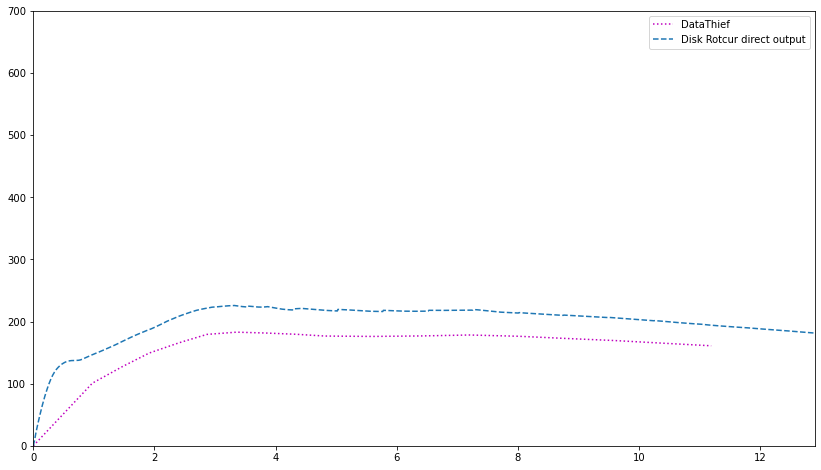

In [19]:
plt.figure(figsize=(14,8))

plt.plot(rd_fromplot,vd_fromplot,':',color='m',markersize=10,label='DataThief')
plt.plot(rdM,np.asarray(vdM),'--',label='Disk Rotcur direct output')
#plt.plot(rd_fromplot,bestg,'r-',label='Fit components (prefactors)(125kpc)')
plt.legend()
plt.ylim([0,700])
plt.xlim([0,12.9])
plt.show()